<a href="https://colab.research.google.com/github/jmunozc98/Project-Portfolio/blob/main/Lapidarist_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lapidarist Problem
### Solved by Juan Muñoz Castillo

The limousine comes to a full stop. As the driver gets out to open the door you take a deep breath and get inside. Inside the meeting room you find the Prime Minister, accompanied by a fat, tall man and a short, deform one with long ears and an even longer nose.

**Prime Minister:** “Ah! You’re here! Great! Let me introduce my guests. This is Fidelious, Minister of Magic, and Krenk, the owner of the Gringotts Wizarding Bank.”

**You:** “Uhhh, ma’am, is this a joke?”

**Fidelious:** “Not at all, but don’t worry, don’t sweat the details, tomorrow you won’t remember anything. Security measures, you see.”

**Krenk:** “Let’s move things along. I don’t like to be exposed to Muggles.”

**You:** “What...” The Prime Minister interrupts you.

**Prime Minister:** “Our friends here seem to have run into a bit of an issue, see, some diamonds seem to have been stolen from the bank. Problem is, the only person... goblin, sorry, ...who saw the diamonds prior to the robbery is our distinguished guest, Krenk.”

**Fidelious:** “And while the Ministry completely believes Krenk as to the diamonds’ worth, we need another person to validate his claim. Safety policies, you see.”

**Prime Minister: **“So, since you’re the best data scientist in our country, I thought you could help. Mr. Krenk will provide you with the characteristics of the missing diamonds so you can give us an estimate of how much the stolen diamonds are worth.”

**You:** “But I’m not a lapidarist.”

**Prime Minister:** “Which is why we’re providing you with a huge dataset, containing characteristics and prices for tens of thousands of diamonds. Now, get working.“

“Huge? Tens of thousands?“ You think. “And I thought I was the clueless one here.”


1: A lapidarist is an expert in precious stones and the art or techniques used in cutting and engraving them.

Here are the characteristics from Krenk’s diamonds, and a link to the Datasets.

# Data Loading and cleaning

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Lapidary data/diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


To ensure data uniformity we need to ask for our dataset to be consistent in the following way:
1. No duplicated values
2. No null values
3. Consistent data type and formatting

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    50968 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        52840 non-null  float64
 8   y        53345 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


This tells us that there are null instances in some columns. As we are looking to implement a ML method, we drop all the dataframe rows and duplicates immediately. We can compute as well the percentage of null values per column to give as feedback to the client.

In [ ]:
data.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth      2962
table         0
price         0
x          1090
y           585
z             0
dtype: int64

In [ ]:
#Percentage of missing data
(data.isnull().sum()/len(data))*100

carat      0.000000
cut        0.000000
color      0.000000
clarity    0.000000
depth      5.492305
table      0.000000
price      0.000000
x          2.021139
y          1.084739
z          0.000000
dtype: float64

In [ ]:
# Removing null and duplicate data entries

clean_data = data.drop_duplicates().dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50843 entries, 0 to 53928
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50843 non-null  float64
 1   cut      50843 non-null  object 
 2   color    50843 non-null  object 
 3   clarity  50843 non-null  object 
 4   depth    50843 non-null  float64
 5   table    50843 non-null  float64
 6   price    50843 non-null  int64  
 7   x        50843 non-null  float64
 8   y        50843 non-null  float64
 9   z        50843 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.3+ MB


Now, we ensure data type is consistent throughout each column. The df.info() method ensures us this, integers and floats are represented correctly with its type but the string columns are always problematic with typos or different formatting per category. We verify the cut column by grouping all different entries:

In [ ]:
clean_data.groupby(['cut']).count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
!Good,1,1,1,1,1,1,1,1,1
#Very Good,1,1,1,1,1,1,1,1,1
&Ideal,1,1,1,1,1,1,1,1,1
&Premium,1,1,1,1,1,1,1,1,1
*'Ideal,2,2,2,2,2,2,2,2,2
Fair,1510,1510,1510,1510,1510,1510,1510,1510,1510
G#ood,1,1,1,1,1,1,1,1,1
Go?od,2,2,2,2,2,2,2,2,2
Good,4627,4627,4627,4627,4627,4627,4627,4627,4627


Grouping the corresponding categories is necessary. This happens throughout the 3 string columns so the same approach will be applied. I am familiar with Regular Expresions but it has been a while since I used it, so for a straightforward approach I will just use the pandas.str.contains() function. I know there is also a library called fuzzywuzz used to give a score for similar words, but this task is for single words and variations not complex enough:

In [ ]:
#Selecting each one of the columns to clean
cut = clean_data['cut']
color = clean_data['color']
clarity = clean_data['clarity']

In [ ]:
#Search criteria for the cut column
VGood = cut.str.contains('V')
Good = cut.str.contains('G')
Ideal = cut.str.contains('al')
Premium = cut.str.contains('mium')

In [ ]:
#Grouping similar categories
clean_data['cut'] = np.where(VGood, 'Very Good',
                             np.where(Good & (~VGood), 'Good',
                             np.where(Ideal, 'Ideal',
                                      np.where(Premium, 'Premium', clean_data['cut']))))

In [ ]:
clean_data.groupby(['cut']).count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1510,1510,1510,1510,1510,1510,1510,1510,1510
Good,4631,4631,4631,4631,4631,4631,4631,4631,4631
Ideal,20238,20238,20238,20238,20238,20238,20238,20238,20238
Premium,13037,13037,13037,13037,13037,13037,13037,13037,13037
Very Good,11427,11427,11427,11427,11427,11427,11427,11427,11427


Same logic for the remaining two columns

In [ ]:
clean_data.groupby(['color']).count()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
!E,2,2,2,2,2,2,2,2,2
!F,1,1,1,1,1,1,1,1,1
!H,1,1,1,1,1,1,1,1,1
!I,1,1,1,1,1,1,1,1,1
#D,1,1,1,1,1,1,1,1,1
#F,1,1,1,1,1,1,1,1,1
#G,1,1,1,1,1,1,1,1,1
#H,1,1,1,1,1,1,1,1,1
&E,1,1,1,1,1,1,1,1,1


In [ ]:
#Search criteria for the cut column
clean_data['color'] = np.where(color.str.contains('E'), 'E',
                             np.where(color.str.contains('F'), 'F',
                             np.where(color.str.contains('H'), 'H',
                             np.where(color.str.contains('I'), 'I',
                             np.where(color.str.contains('D'), 'D',
                             np.where(color.str.contains('G'), 'G',
                                      np.where(color.str.contains('J'), 'J', clean_data['color'])))))))

In [ ]:
clean_data.groupby(['color']).count()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,6380,6380,6380,6380,6380,6380,6380,6380,6380
E,9238,9238,9238,9238,9238,9238,9238,9238,9238
F,9013,9013,9013,9013,9013,9013,9013,9013,9013
G,10604,10604,10604,10604,10604,10604,10604,10604,10604
H,7861,7861,7861,7861,7861,7861,7861,7861,7861
I,5101,5101,5101,5101,5101,5101,5101,5101,5101
J,2646,2646,2646,2646,2646,2646,2646,2646,2646


In [ ]:
clean_data.groupby(['clarity']).count()

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
!VS2,1,1,1,1,1,1,1,1,1
#SI!1,1,1,1,1,1,1,1,1,1
#VS1,1,1,1,1,1,1,1,1,1
&SI2,1,1,1,1,1,1,1,1,1
&VS2,1,1,1,1,1,1,1,1,1
*'SI1,1,1,1,1,1,1,1,1,1
*'SI2,1,1,1,1,1,1,1,1,1
I1,709,709,709,709,709,709,709,709,709
IF,1679,1679,1679,1679,1679,1679,1679,1679,1679


In [ ]:
clean_data['clarity'] = np.where((~clean_data['clarity'].str.isalnum()), 'special character',clean_data['clarity'])
clean_data.groupby(['clarity']).count()

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
I1,709,709,709,709,709,709,709,709,709
IF,1679,1679,1679,1679,1679,1679,1679,1679,1679
SI1,12337,12337,12337,12337,12337,12337,12337,12337,12337
SI2,8659,8659,8659,8659,8659,8659,8659,8659,8659
VS1,7694,7694,7694,7694,7694,7694,7694,7694,7694
VS2,11517,11517,11517,11517,11517,11517,11517,11517,11517
VVS1,3430,3430,3430,3430,3430,3430,3430,3430,3430
VVS2,4795,4795,4795,4795,4795,4795,4795,4795,4795
special character,23,23,23,23,23,23,23,23,23


The previous method would take to long for this case, so I decided to use the df.str.isalnum() method to get back a boolean array to where the special characters are, but I was struggling to find a way to remove those special characters. At this point I decided to review my RegEx notes and found the easiest solution. A one line string replacement that works for all the previous cases:

Finding all special characters throughout the column and deleting them.

The regular expression [^\w\s] will match any character that is not a word character or whitespace character. Let's break it down:

- []: Denotes a character class, which means it matches any single character contained within the brackets.
- ^: Negation of a character class, meaning it matches characters not specified within the class.
- \w: This is a shorthand for any word character. It matches any alphanumeric character plus underscore ([a-zA-Z0-9_]).
- \s: This is a shorthand for any whitespace character. It matches spaces, tabs, newlines, etc.

So, [^\w\s] with the pd.str.replace() method, substitutes special characters for '', so it deletes them.

Ignoring the previous attempt and streamlining it into the following 3 lines:

In [ ]:
clean_data = data.drop_duplicates().dropna()

clean_data['cut'] = clean_data['cut'].str.replace('[^\w\s]', '', regex=True)
clean_data['color'] = clean_data['color'].str.replace('[^\w\s]', '', regex=True)
clean_data['clarity'] = clean_data['clarity'].str.replace('[^\w\s]', '', regex=True)


print(clean_data.groupby(['cut']).count())
print(clean_data.groupby(['color']).count())
clean_data.groupby(['clarity']).count()

           carat  color  clarity  depth  table  price      x      y      z
cut                                                                       
Fair        1510   1510     1510   1510   1510   1510   1510   1510   1510
Good        4631   4631     4631   4631   4631   4631   4631   4631   4631
Ideal      20238  20238    20238  20238  20238  20238  20238  20238  20238
Premium    13037  13037    13037  13037  13037  13037  13037  13037  13037
Very Good  11427  11427    11427  11427  11427  11427  11427  11427  11427
       carat    cut  clarity  depth  table  price      x      y      z
color                                                                 
D       6380   6380     6380   6380   6380   6380   6380   6380   6380
E       9238   9238     9238   9238   9238   9238   9238   9238   9238
F       9013   9013     9013   9013   9013   9013   9013   9013   9013
G      10604  10604    10604  10604  10604  10604  10604  10604  10604
H       7861   7861     7861   7861   7861   7861

,carat,cut,color,depth,table,price,x,y,z
clarity,,,,,,,,,
I1,709,709,709,709,709,709,709,709,709
IF,1679,1679,1679,1679,1679,1679,1679,1679,1679
SI1,12344,12344,12344,12344,12344,12344,12344,12344,12344
SI2,8663,8663,8663,8663,8663,8663,8663,8663,8663
VS1,7697,7697,7697,7697,7697,7697,7697,7697,7697
VS2,11523,11523,11523,11523,11523,11523,11523,11523,11523
VVS1,3432,3432,3432,3432,3432,3432,3432,3432,3432
VVS2,4796,4796,4796,4796,4796,4796,4796,4796,4796


In [ ]:
clean_data.nunique()

carat        272
cut            5
color          7
clarity        8
depth        184
table        125
price      11345
x            557
y            552
z            377
dtype: int64

In [ ]:
clean_data.describe()

,carat,depth,table,price,x,y,z
count,50843.000000,50843.000000,50843.000000,50843.000000,50843.000000,50843.000000,50843.000000
mean,0.797662,61.748461,57.458431,3930.923431,5.729524,5.732817,3.537745
std,0.473622,1.432295,2.232276,3988.157204,1.126902,1.141440,0.708884
min,0.200000,43.000000,43.000000,326.000000,-6.370000,-5.320000,-4.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5316.500000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We see that there are negative values for x, y and z. Interpreting these column values as diamond measurements, it must be a typo or a mistake to have negative length measurements along spatial axes. Same case with zero length measurements. I will proceed to remove these data entries:

In [ ]:
clean_data.drop(clean_data[(clean_data['x']<=0) | (clean_data['y']<=0) | (clean_data['z']<=0)].index,
                inplace= True)

This leaves us with the final dataset, where null values are removed and data uniformity accross categories and coherent entries is ensured.

# Exploratory Data Analysis

In [ ]:
clean_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Considering x,y,z values as length measurements across the 3 axes, and acknowledging the lack of uniformity diamonds present, i.e. not presenting a mandatory cubic shape, I will create a third column corresponding to the volume diamonds could theorically present. Understanding this does not mean or translate into the actual volume of the diamond, it still gives us clearer information regarding the size of the diamond.

In [ ]:
#calculating a representative volume column called rep. vol.
clean_data['rep_vol'] = clean_data['x']*clean_data['y']*clean_data['z']

In [ ]:
#Before doing EDA, I will separate numerical and categorical variables for easy data handling

cat_cols = clean_data.select_dtypes(include= ['object']).columns
num_cols = clean_data.select_dtypes(include= ['int64', 'float64']).columns.tolist()

print('Categorical Variables:')
print(cat_cols)
print('Numerical Variables:')
print(num_cols)

Categorical Variables:
Index(['cut', 'color', 'clarity'], dtype='object')
Numerical Variables:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'rep_vol']


## Univariate analysis

In [ ]:
import matplotlib.pyplot as plt

clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50811.0,0.797453,0.473416,0.200000,0.400000,0.700000,1.040000,5.01000
depth,50811.0,61.748651,1.431945,43.000000,61.000000,61.800000,62.500000,79.00000
table,50811.0,57.458129,2.231925,43.000000,56.000000,57.000000,59.000000,95.00000
price,50811.0,3929.232253,3986.049196,326.000000,948.500000,2400.000000,5315.000000,18823.00000
x,50811.0,5.731109,1.119204,3.730000,4.710000,5.700000,6.540000,10.74000
y,50811.0,5.733949,1.135820,3.710000,4.720000,5.710000,6.540000,58.90000
z,50811.0,3.539675,0.703026,1.070000,2.910000,3.530000,4.030000,31.80000
rep_vol,50811.0,129.847150,78.208321,32.243239,65.136244,114.810696,170.839422,3840.59806


From the statistics summary we can infer the following:


1.   Due to 50% of the data's carat value is between 0. 2 and 0.7, and 75% is below 1 and considering a maximum value of 5, high carat value is rare. Mean value is also just below 0.8, therefore carat's histogram should be notably right-skewed:
2.   Depth and table values are similar regarding its tendencies. Data appears to be normally distributed with a mean at 61 and 57 respectively.
3. The representative volume has a mean of 129.8 cubic units, with a 50% smaller than 114.8 cubic units and 75% of 170. Nevertheless there are diamonds that present a representative value of 3840 cubic units. So diamonds present a normal distribution with some outliers that are very big.





carat
Skew:  1.11


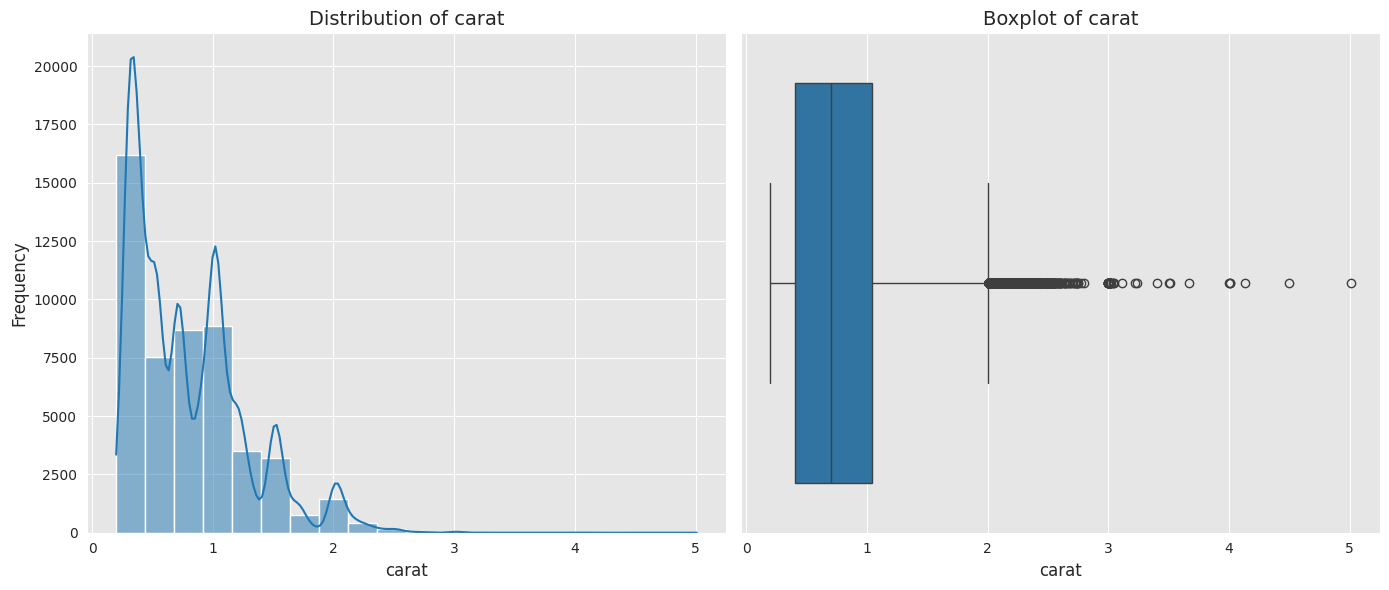

depth
Skew:  -0.13


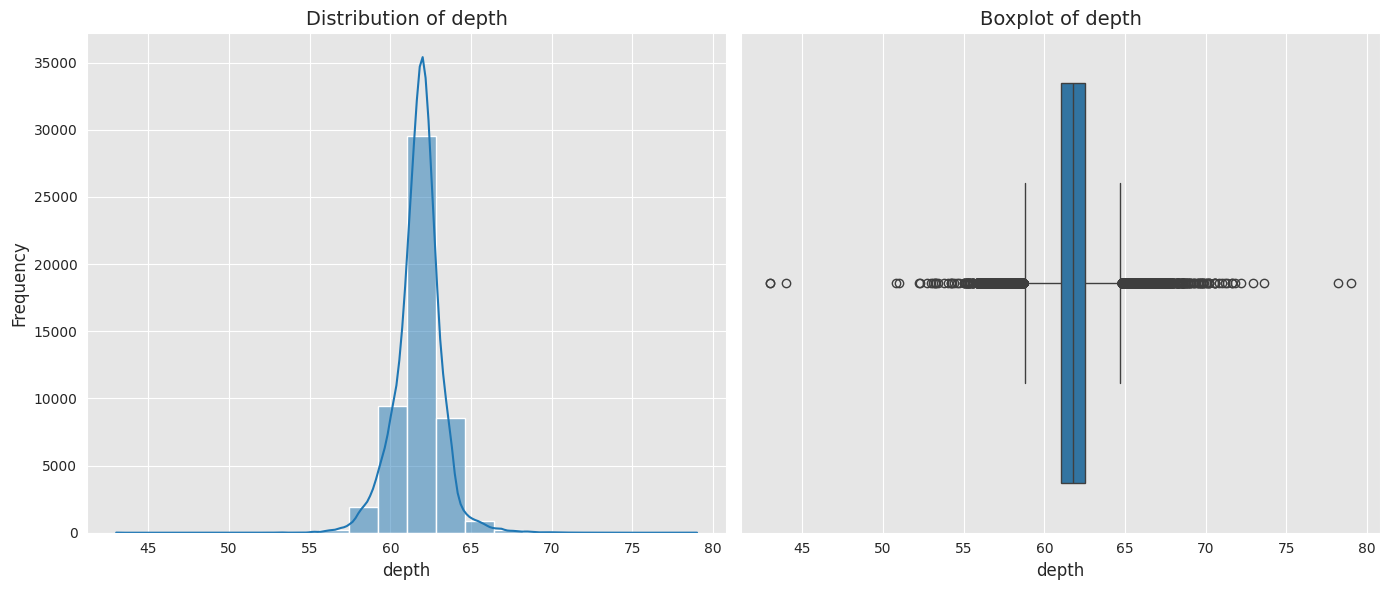

table
Skew:  0.78


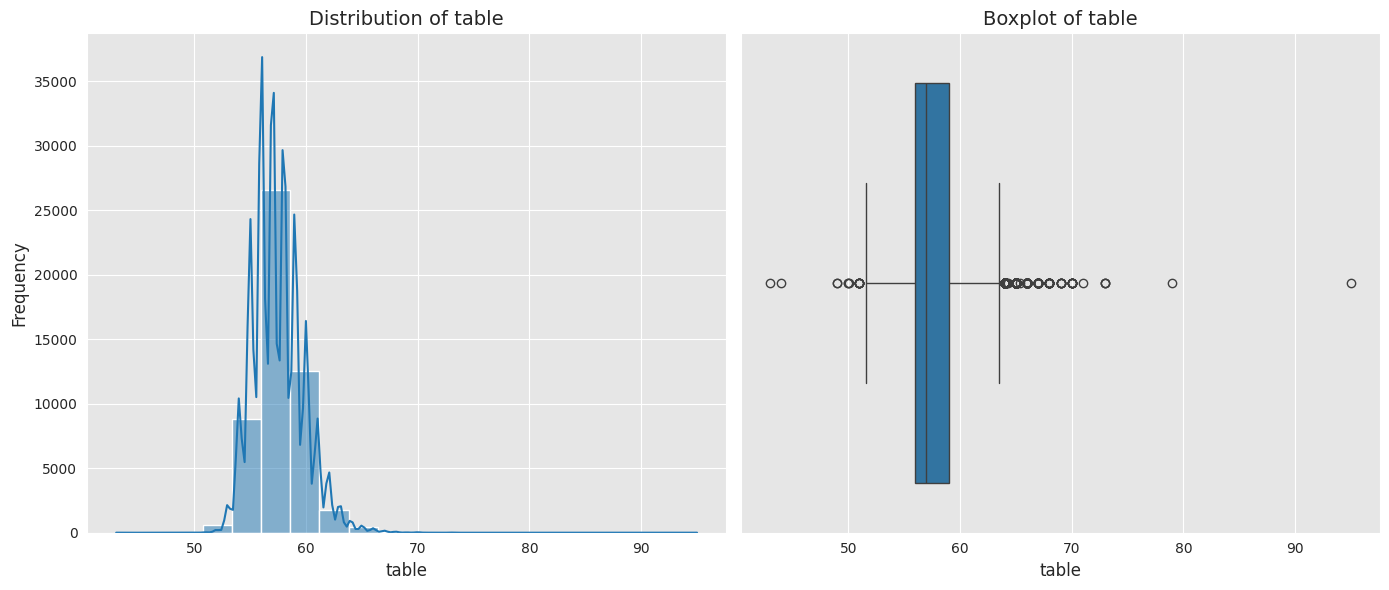

price
Skew:  1.62


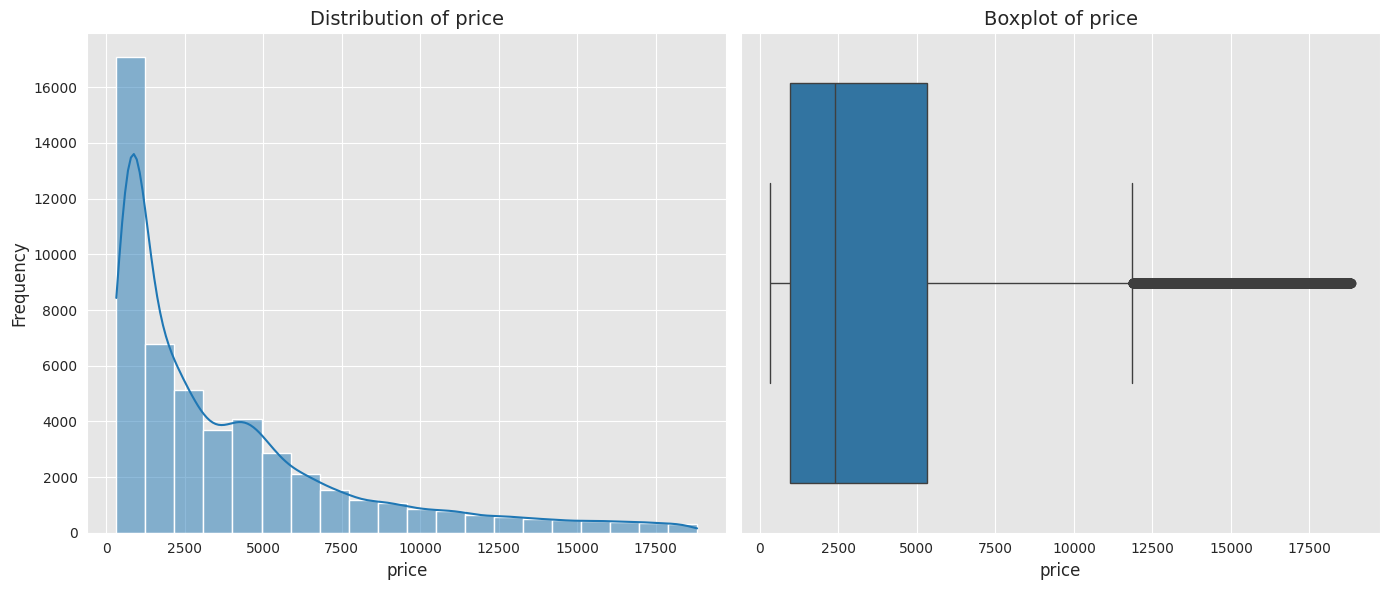

x
Skew:  0.4


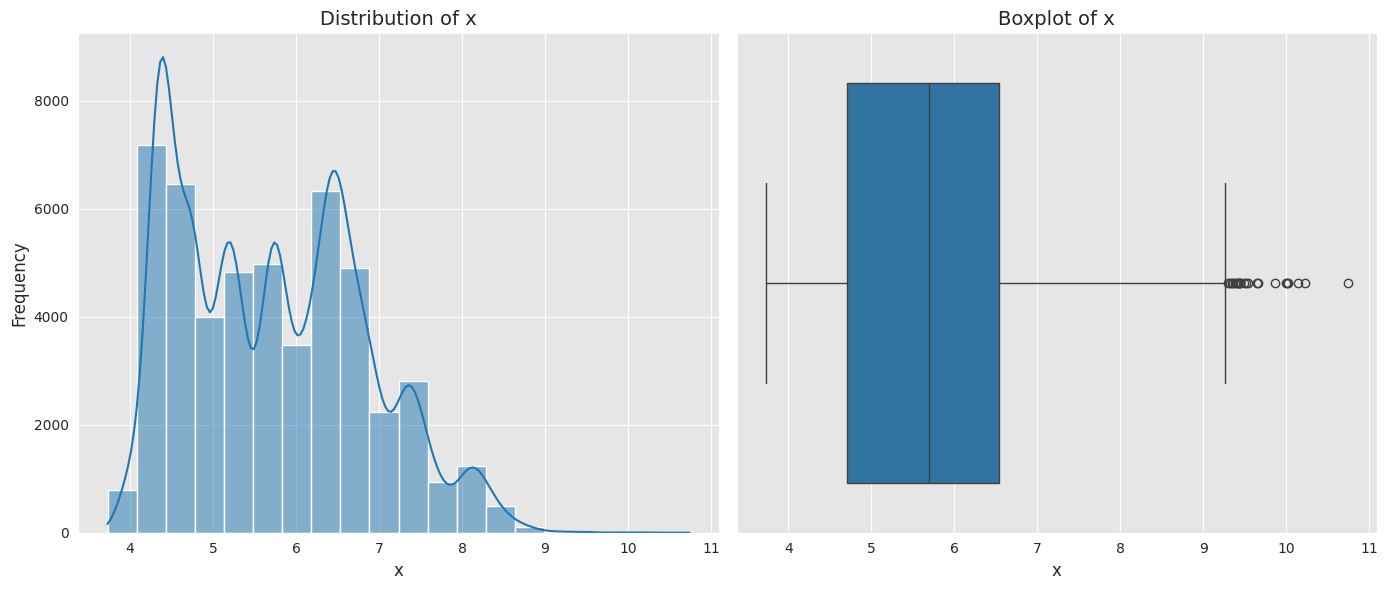

y
Skew:  2.38


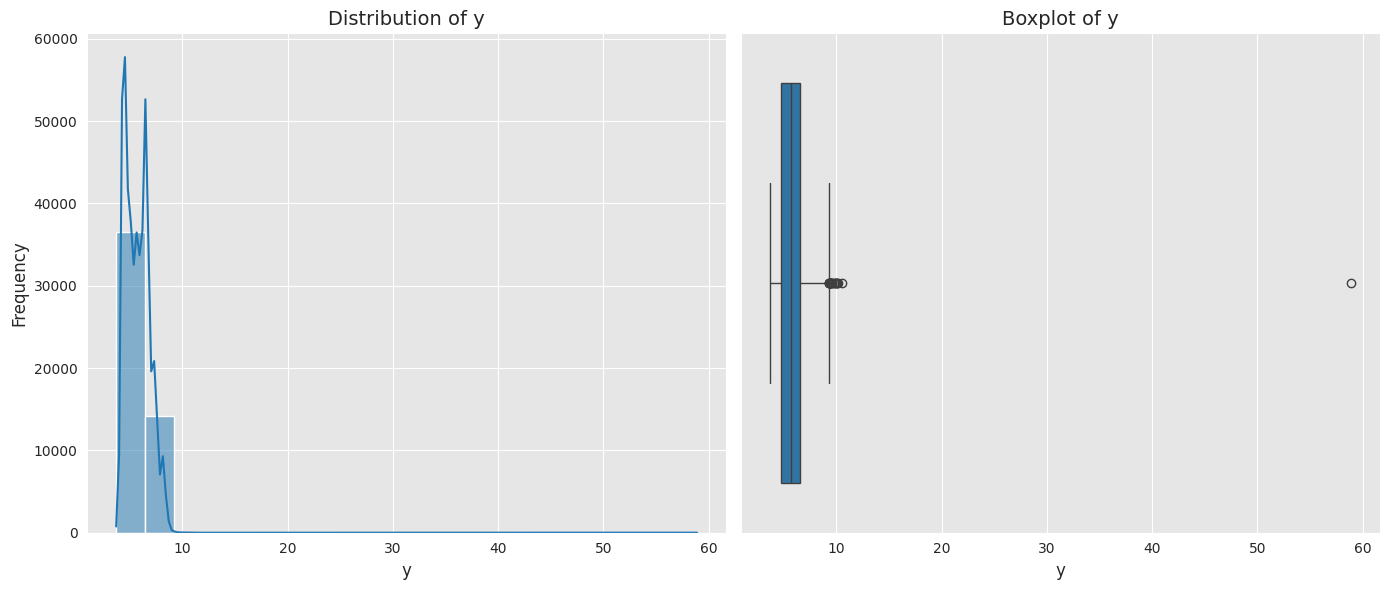

z
Skew:  1.65


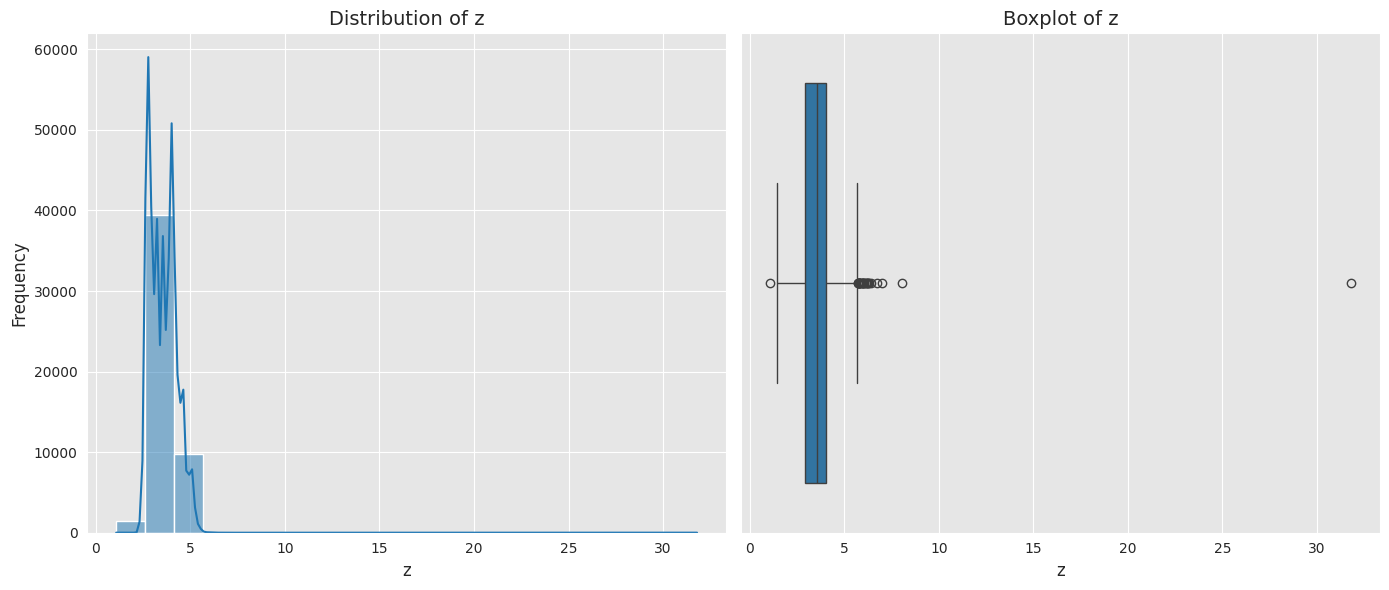

rep_vol
Skew:  3.15


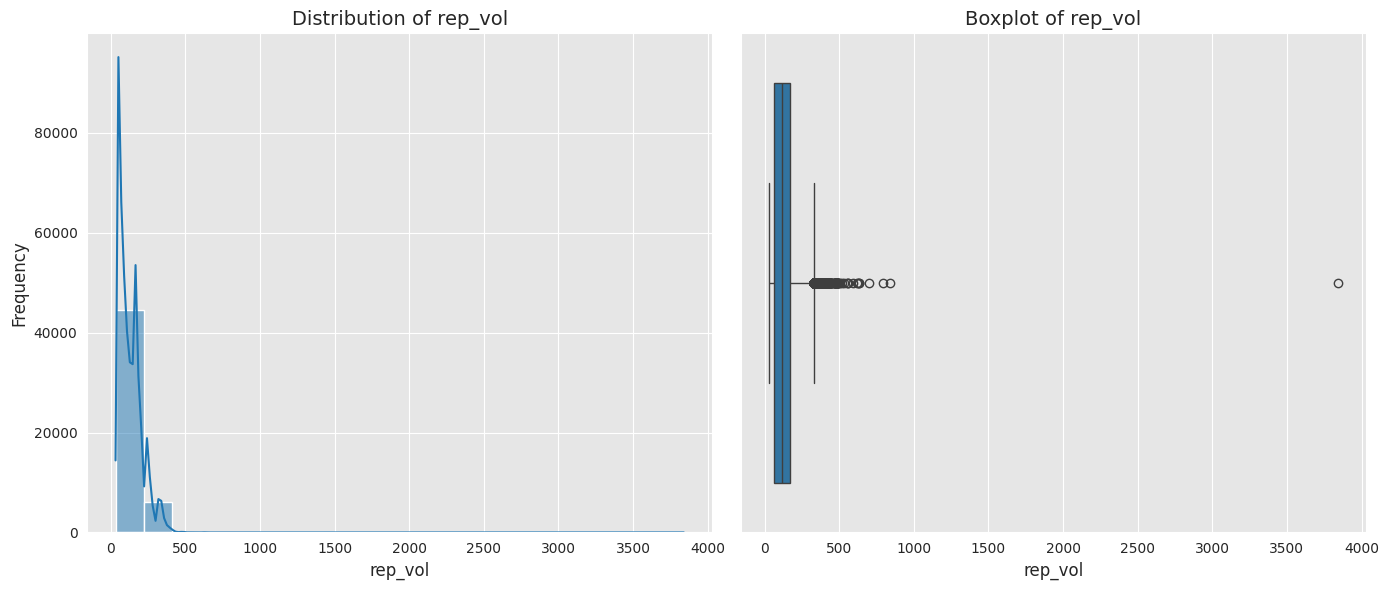

In [ ]:
# @title Histograms of numerical data

import seaborn as sns

# Set seaborn style with grey background
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

for col in num_cols:
    print(col)
    print('Skew: ', round(clean_data[col].skew(), 2))

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram
    sns.histplot(data=clean_data, x=col, bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(data=clean_data, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

We observe 75% of the diamond samples are under the $5,315 price and therefore, a right-skewed distribution with a majority of cheaper diamonds. We observe those outliers in the volume, specifically y and z column:


In [ ]:
clean_data.sort_values('rep_vol', ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z,rep_vol,carat_log,price_log,rep_vol_log
24063,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,3840.598060,0.693147,9.410011,8.253383
48401,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.502400,-0.673345,7.585789,6.731617
27411,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208,1.611436,9.799127,6.672202
27626,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,698.455296,1.504077,9.827200,6.548871
27126,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,633.355000,1.418277,9.760137,6.451031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31597,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31,32.396364,-1.609438,5.905362,3.478046
31587,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26,32.291558,-1.609438,5.905362,3.474806
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,32.262375,-1.609438,5.843544,3.473902
31588,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24,32.260032,-1.609438,5.905362,3.473829


In [ ]:

clean_data.sort_values('z', ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z,rep_vol,carat_log,price_log,rep_vol_log
48401,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.502400,-0.673345,7.585789,6.731617
24063,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,3840.598060,0.693147,9.410011,8.253383
27411,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208,1.611436,9.799127,6.672202
27626,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,698.455296,1.504077,9.827200,6.548871
27126,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,633.355000,1.418277,9.760137,6.451031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31588,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24,32.260032,-1.609438,5.905362,3.473829
39240,0.38,Ideal,E,VVS2,60.9,56.0,1068,4.71,4.68,2.06,45.408168,-0.967584,6.973543,3.815692
20690,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53,85.259250,0.425268,9.101752,4.445697
21650,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41,74.417262,0.343590,9.185228,4.309688


In [ ]:
clean_data.sort_values('y', ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z,rep_vol,carat_log,price_log,rep_vol_log
24063,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,3840.598060,0.693147,9.410011,8.253383
27411,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208,1.611436,9.799127,6.672202
27626,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,698.455296,1.504077,9.827200,6.548871
25994,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,631.894380,1.388791,9.630563,6.448722
26440,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,627.841214,1.386294,9.679344,6.442287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,32.262375,-1.609438,5.843544,3.473902
31595,0.20,Ideal,E,VS2,62.2,57.0,367,3.76,3.73,2.33,32.677784,-1.609438,5.905362,3.486695
31597,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31,32.396364,-1.609438,5.905362,3.478046
31592,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33,32.243239,-1.609438,5.905362,3.473308


These could be an outlier reasonably deleted from the dataset due to the massive increase from the rest of the data. All dimensions are on further than 12 units. The dimension of the dataset is also big enough for this to be negligible.

In [ ]:
clean_data.drop(index=[24063, 48401], inplace=True)

carat
Skew:  1.11


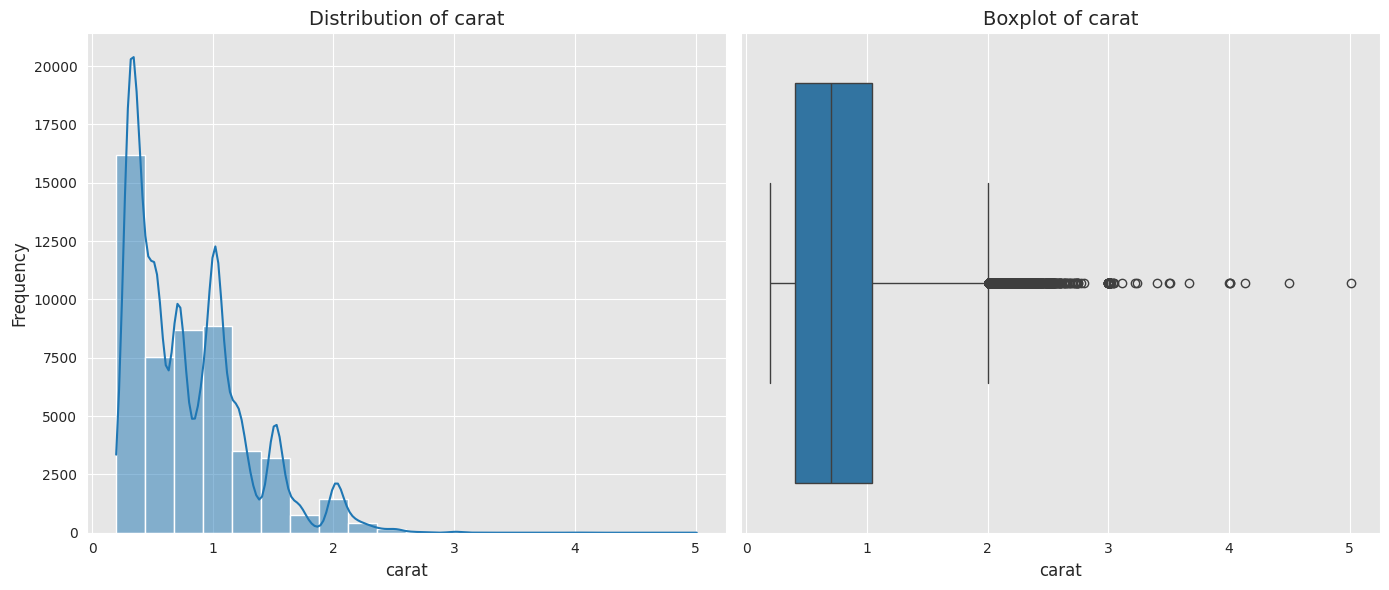

depth
Skew:  -0.13


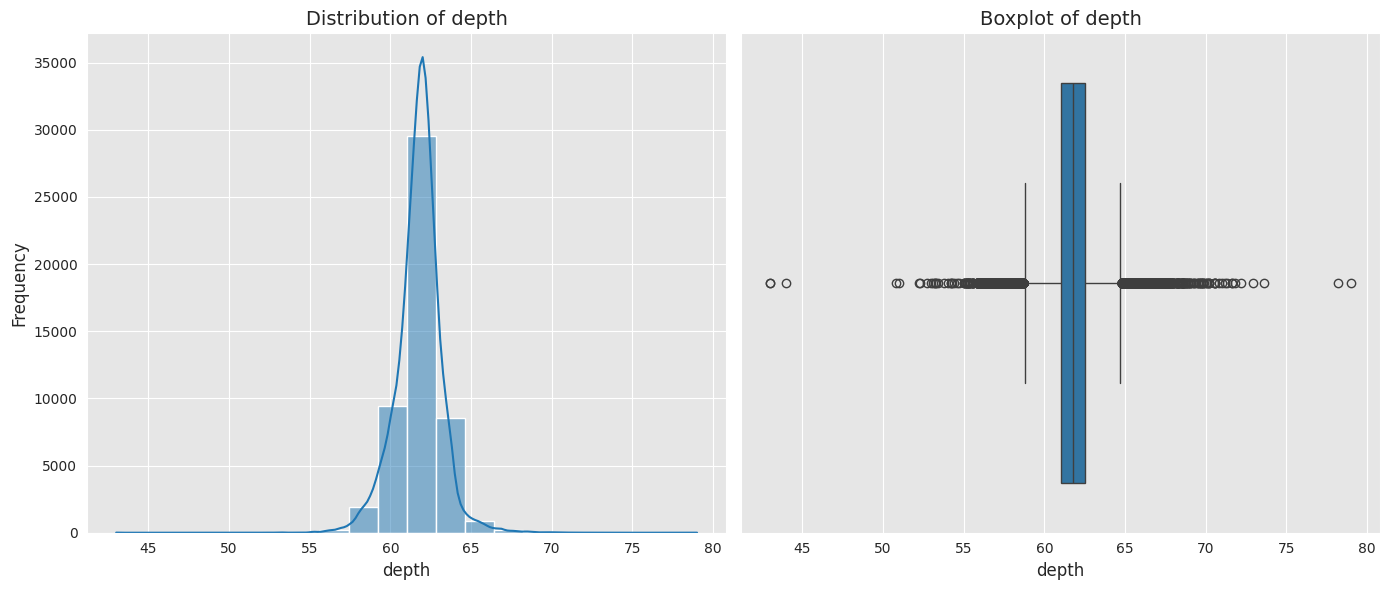

table
Skew:  0.78


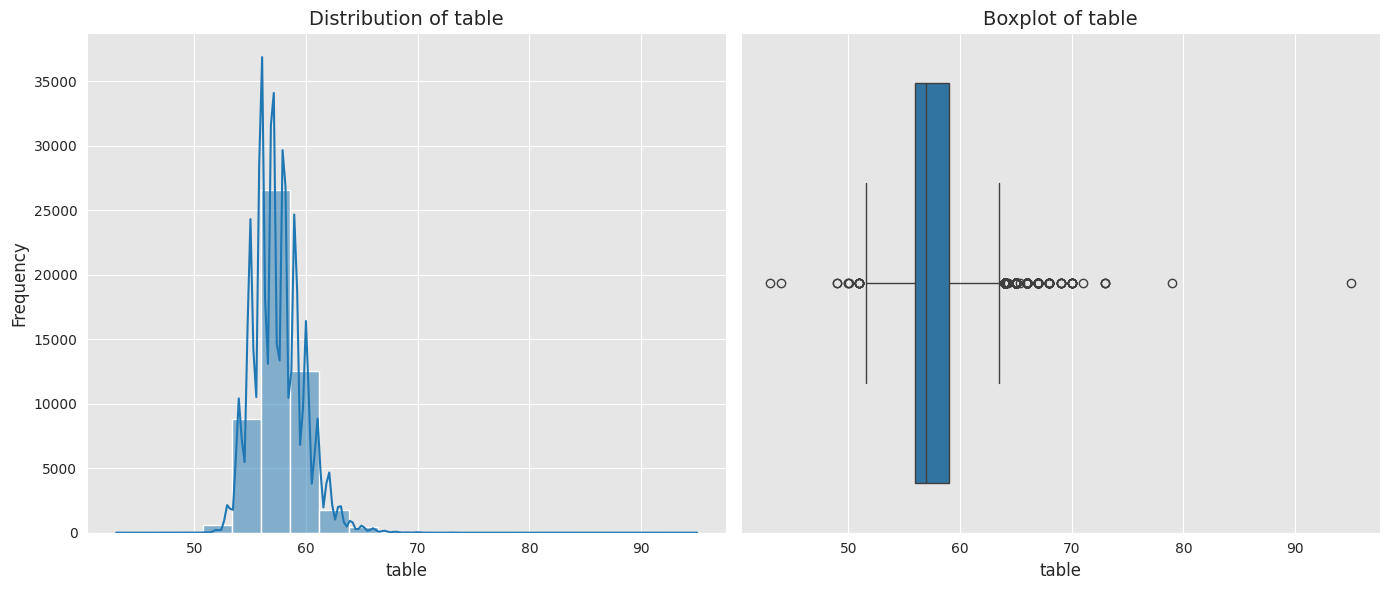

price
Skew:  1.62


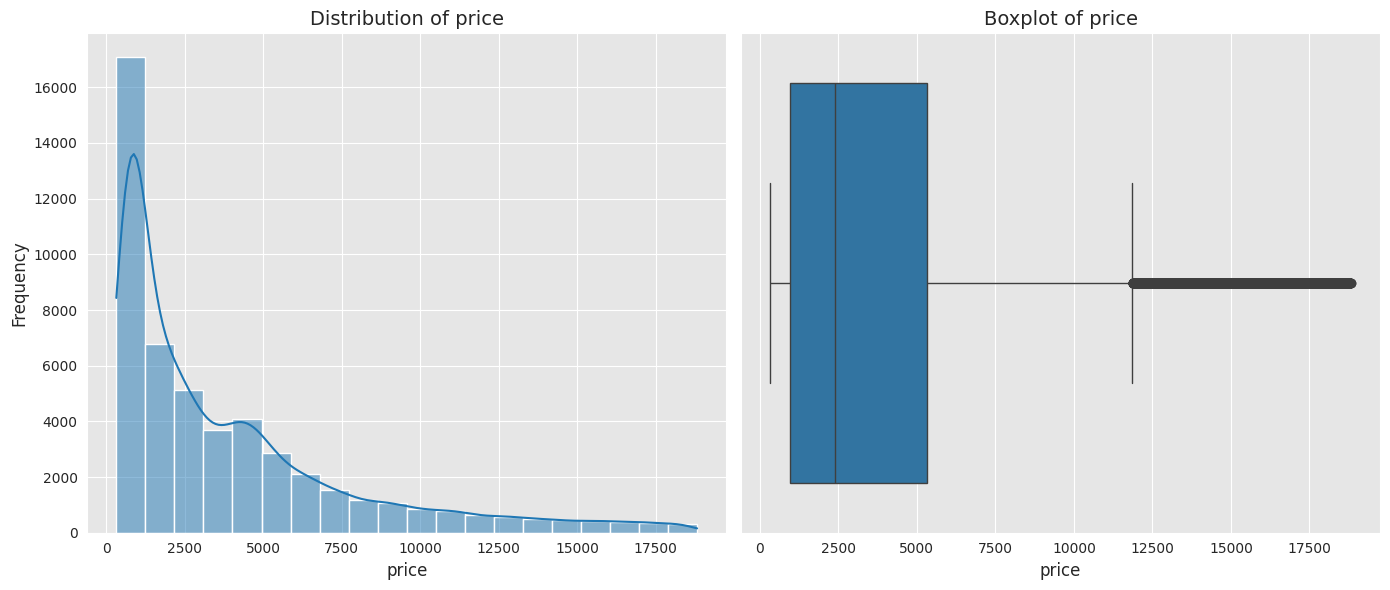

x
Skew:  0.4


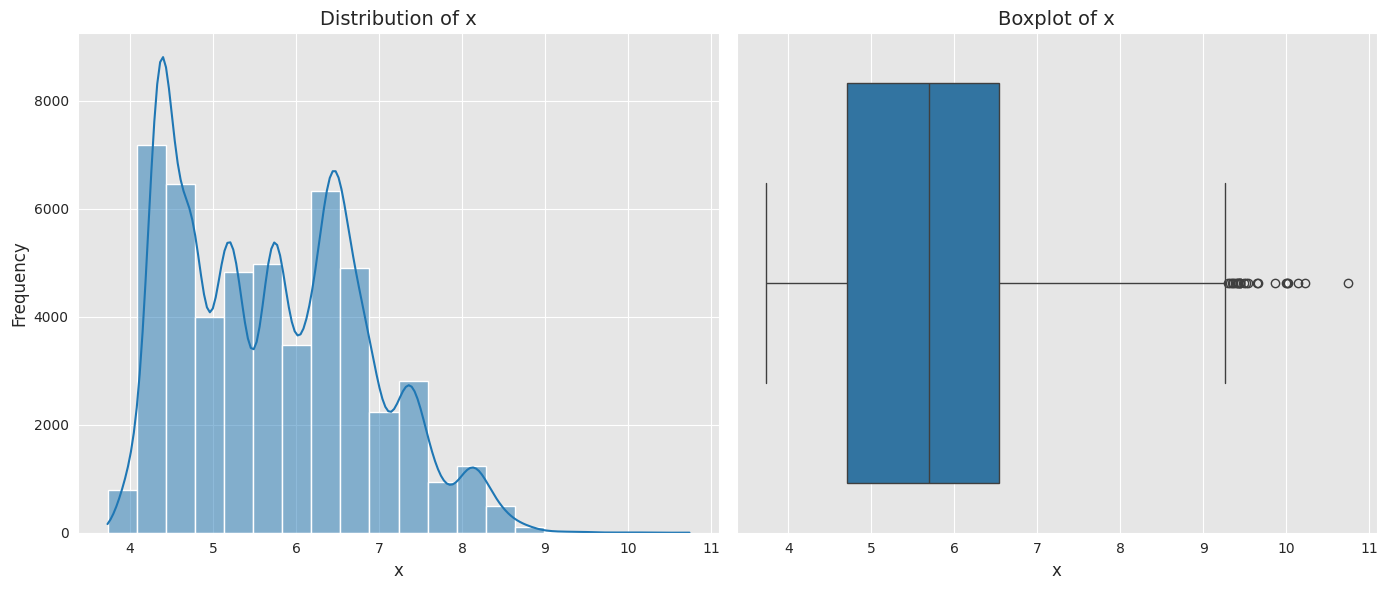

y
Skew:  0.39


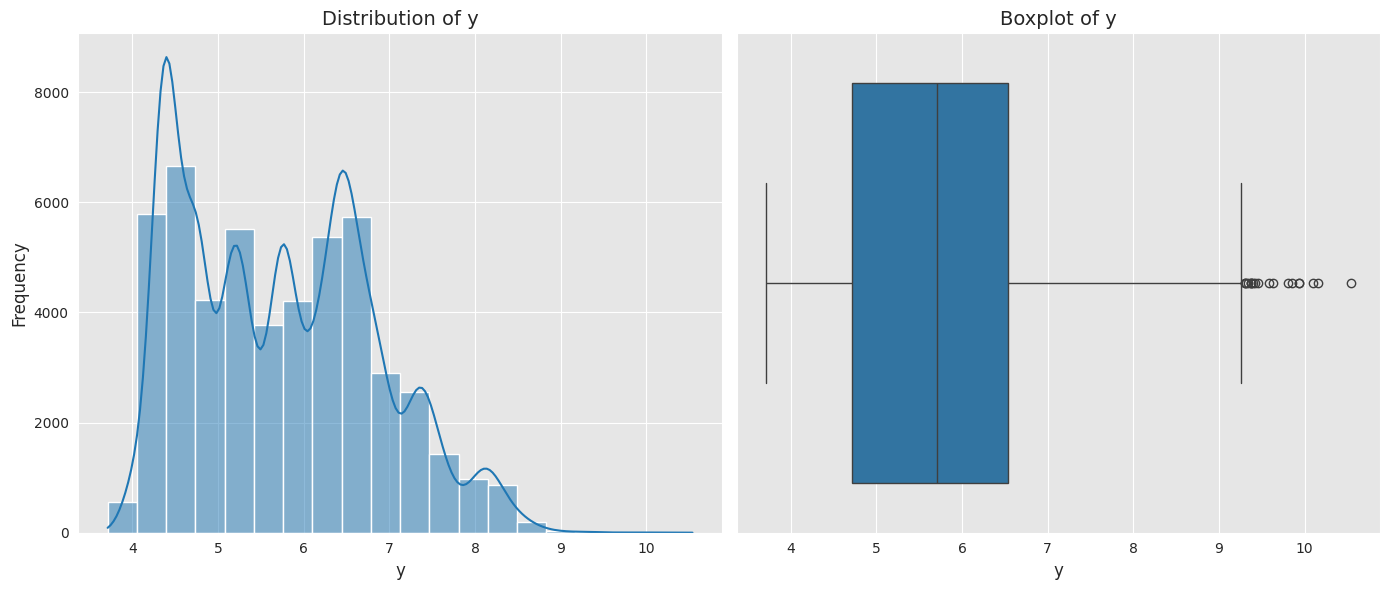

z
Skew:  0.39


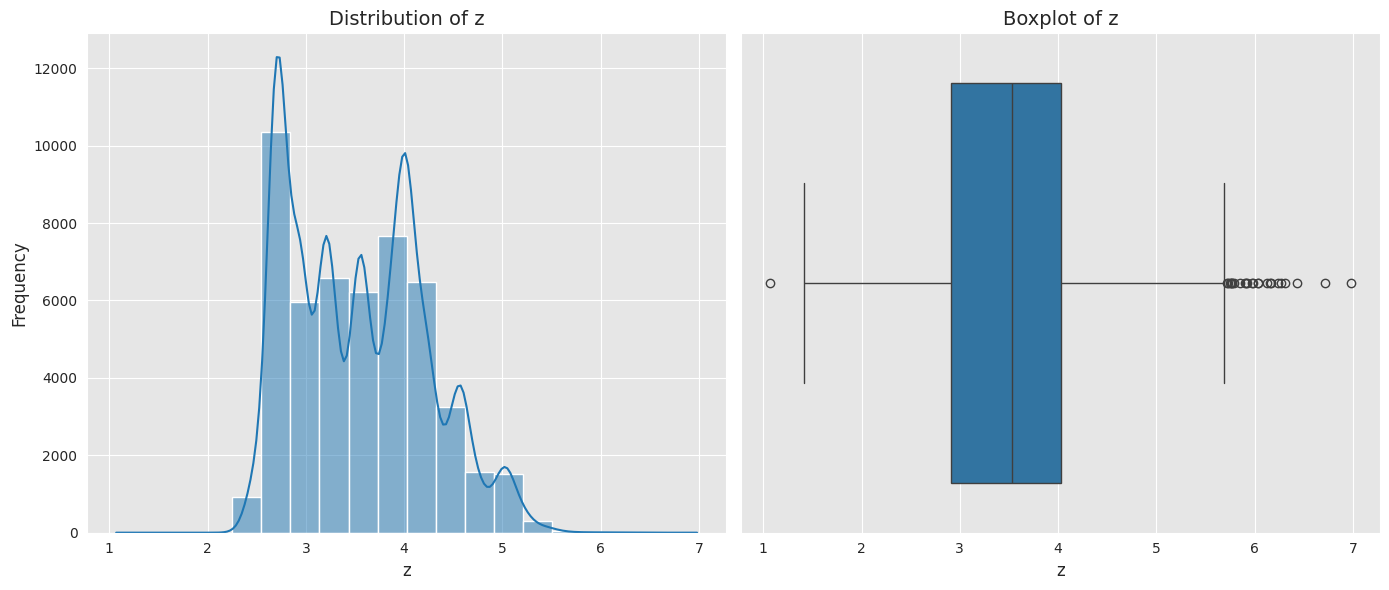

rep_vol
Skew:  1.11


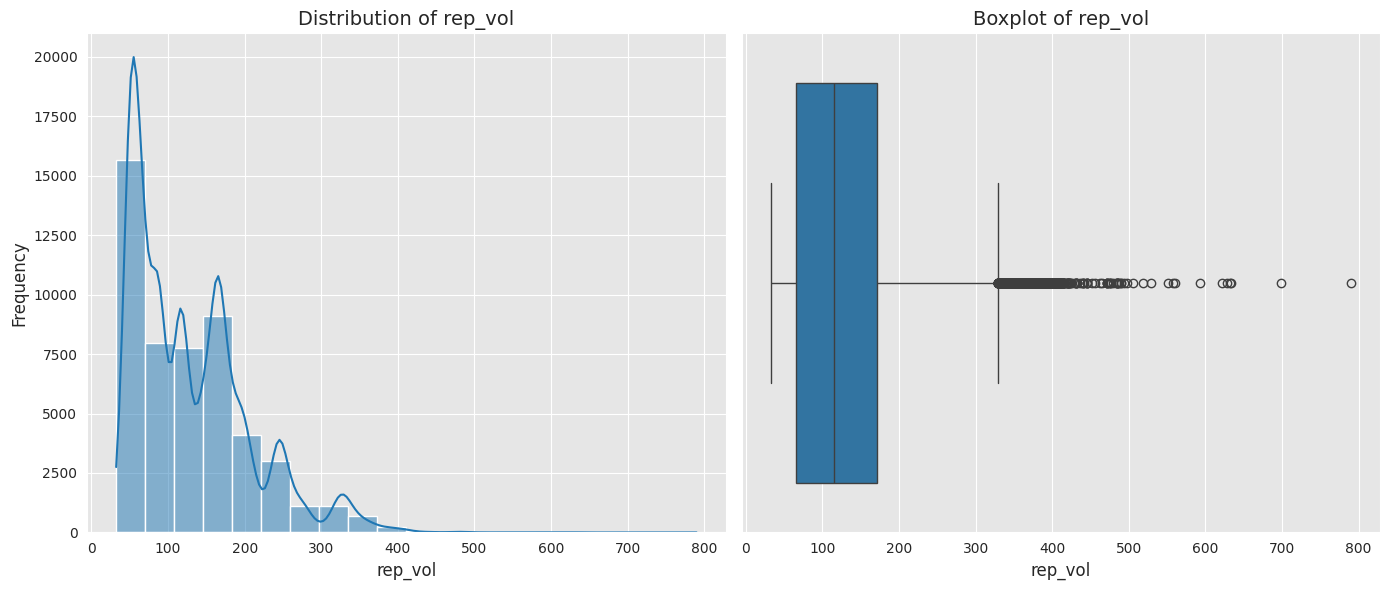

In [ ]:
# @title Histograms of numerical data

import seaborn as sns

# Set seaborn style with grey background
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

for col in num_cols:
    print(col)
    print('Skew: ', round(clean_data[col].skew(), 2))

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram
    sns.histplot(data=clean_data, x=col, bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(data=clean_data, x=col, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

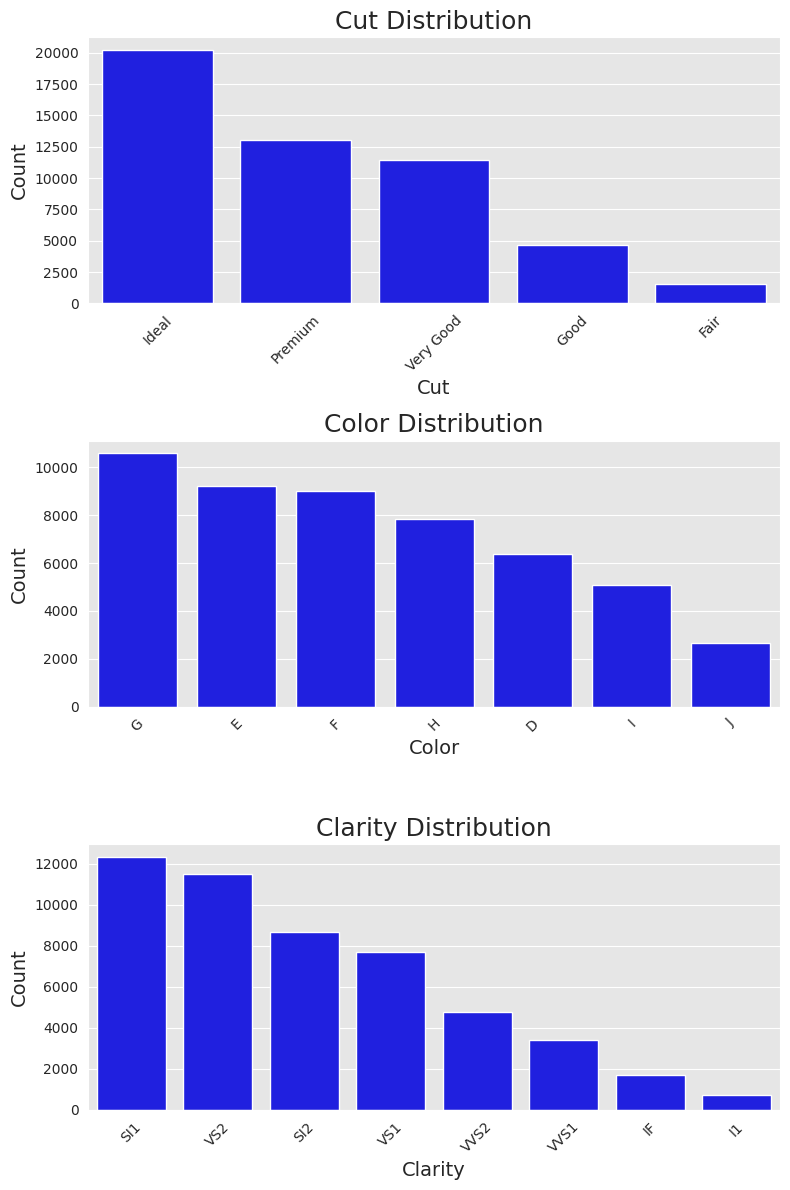

In [ ]:
# @title Categorical boxplots

figure, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot countplots for each categorical variable
sns.countplot(x='cut', data=clean_data, color='blue',
              order=clean_data['cut'].value_counts().index, ax=axes[0])
axes[0].set_title('Cut Distribution', fontsize=18)
axes[0].set_xlabel('Cut', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', labelrotation=45)

sns.countplot(x='color', data=clean_data, color='blue',
              order=clean_data['color'].value_counts().index, ax=axes[1])
axes[1].set_title('Color Distribution', fontsize=18)
axes[1].set_xlabel('Color', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', labelrotation=45)

sns.countplot(x='clarity', data=clean_data, color='blue',
              order=clean_data['clarity'].value_counts().index, ax=axes[2])
axes[2].set_title('Clarity Distribution', fontsize=18)
axes[2].set_xlabel('Clarity', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


From this we notice:

1. There is a majority of Ideal diamonds
2. Majority and rareness for both ends of clarity and color diamonds

## Data transformation

carat, price and rep_vol have a skewed distribution and on a larger scale.

This hints us a logarithmic scale transformation could be useful. We can apply it and see how the data distribution behaves. A logarithmic scale transformation is pertinent when the variables being analyzed exhibit exponential growth or decay, and the range of values spans several orders of magnitude


In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50811 entries, 0 to 53928
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        50811 non-null  float64
 1   cut          50811 non-null  object 
 2   color        50811 non-null  object 
 3   clarity      50811 non-null  object 
 4   depth        50811 non-null  float64
 5   table        50811 non-null  float64
 6   price        50811 non-null  int64  
 7   x            50811 non-null  float64
 8   y            50811 non-null  float64
 9   z            50811 non-null  float64
 10  rep_vol      50811 non-null  float64
 11  carat_log    50811 non-null  float64
 12  price_log    50811 non-null  float64
 13  rep_vol_log  50811 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 5.8+ MB


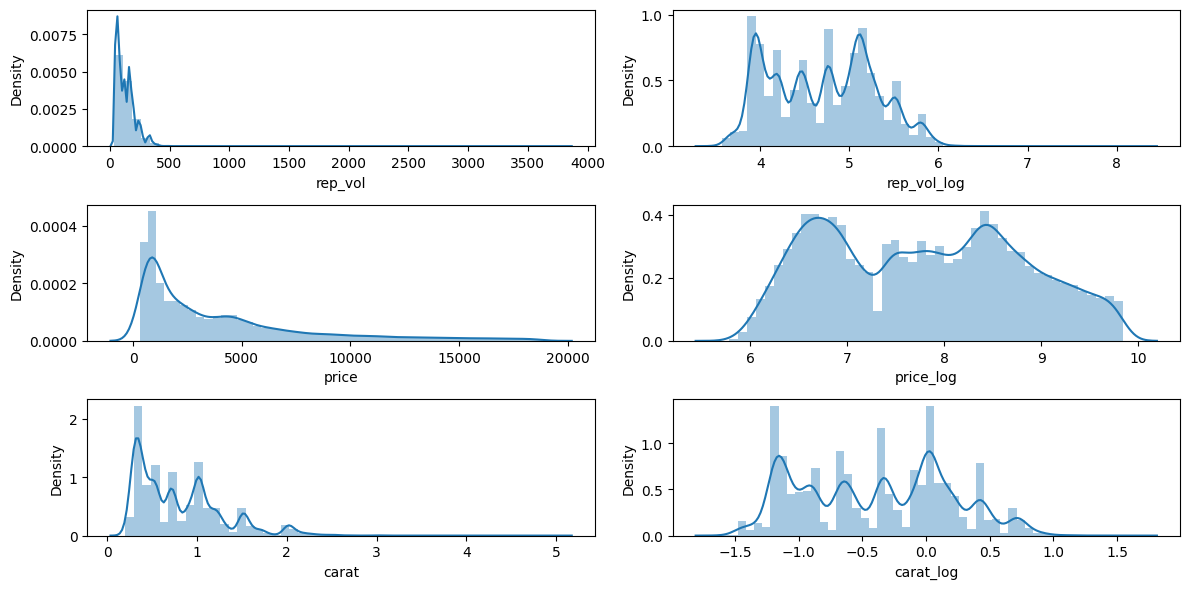

In [ ]:
log_transform(clean_data,['carat','price', 'rep_vol'])


import warnings
warnings.filterwarnings("ignore")


fig, axes = plt.subplots(3, 2, figsize=(12, 6))

sns.distplot(clean_data["rep_vol"], ax=axes[0,0], axlabel="rep_vol")
sns.distplot(clean_data["rep_vol_log"], ax=axes[0,1], axlabel="rep_vol_log")

sns.distplot(clean_data["price"],  ax=axes[1,0], axlabel="price");
sns.distplot(clean_data["price_log"],  ax=axes[1,1], axlabel="price_log");

sns.distplot(clean_data["carat"],  ax=axes[2,0], axlabel="carat");
sns.distplot(clean_data["carat_log"],  ax=axes[2,1], axlabel="carat_log");

plt.tight_layout()
plt.show()

## Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

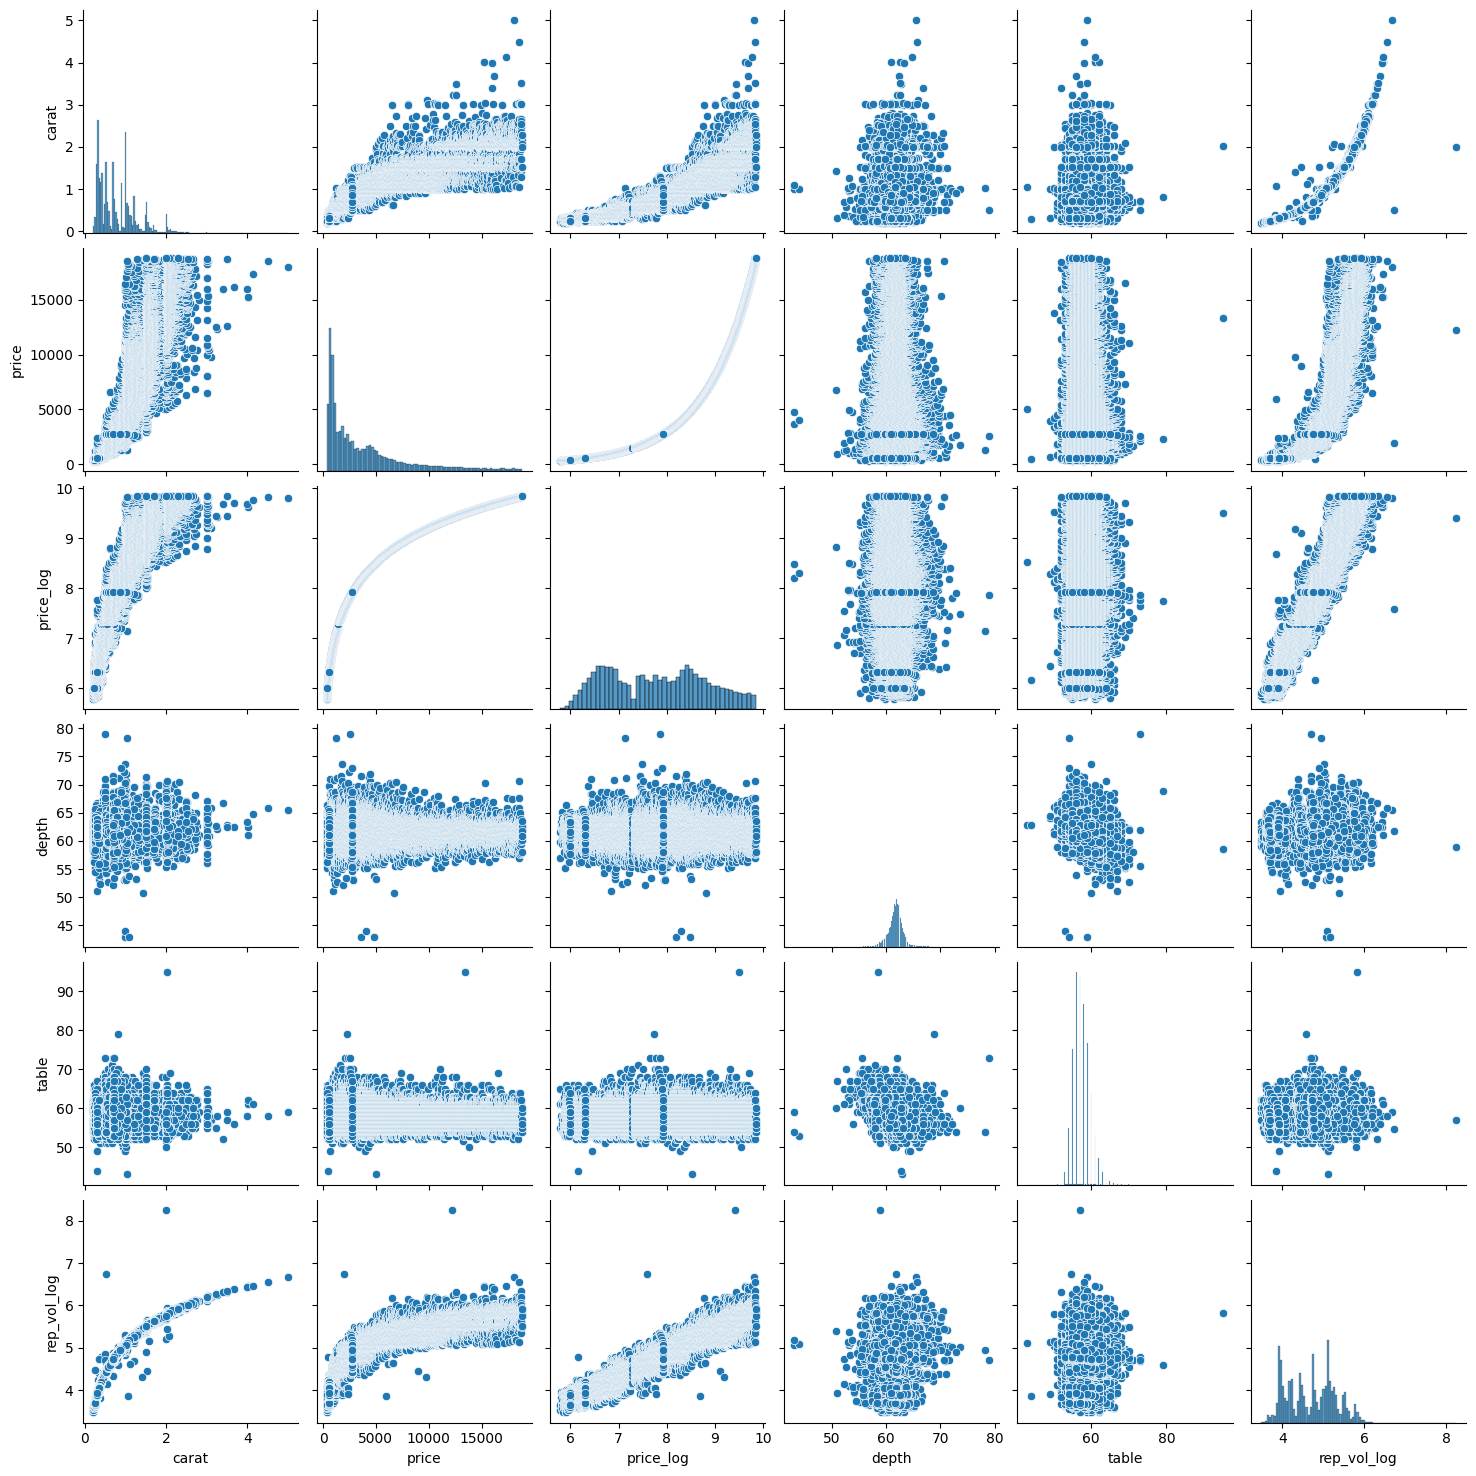

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=clean_data[['carat', 'price', 'price_log', 'depth', 'table', 'rep_vol_log']])
plt.show()

We observe the following insights:
1. Carat has the biggest influence in price. As it increases, price increases logarithmically, i.e. it increases at a decreasing rate.
2. Depth and table values have no correlation with price
3. Diamond size (representative volume) has a strong positive logarithmic correlation with price

This appears to point in the direction of a strong correlation coefficient. When calculating the correlation via Seaborn's heatmap, this could be confirmed and a logarithmic regression model should suffice to predict the values of the missing diamonds.

Emphasizing the need to use a logarithmic scale, we can plot the differences:

<Figure size 1300x1700 with 0 Axes>

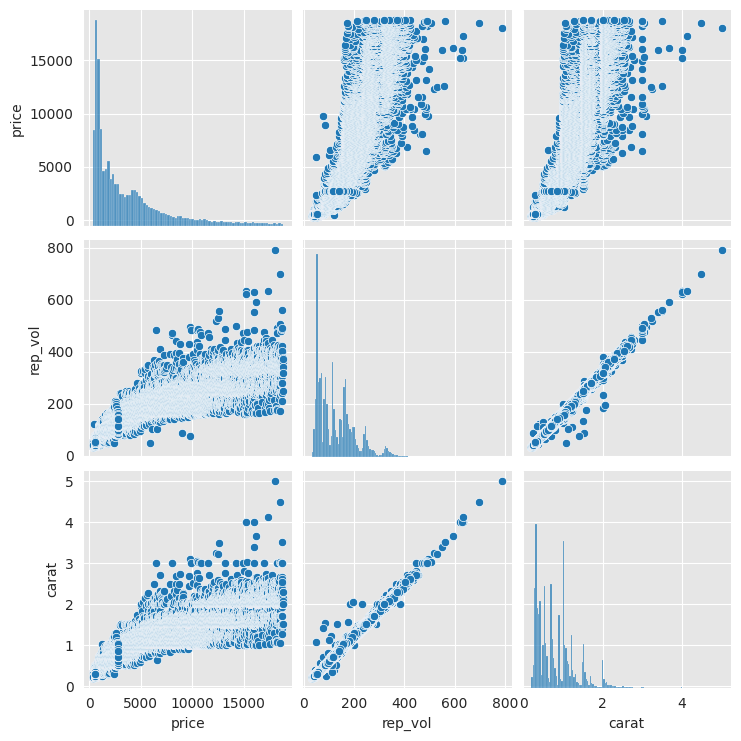

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=clean_data[['price', 'rep_vol',  'carat']])
plt.show()

<Figure size 1300x1700 with 0 Axes>

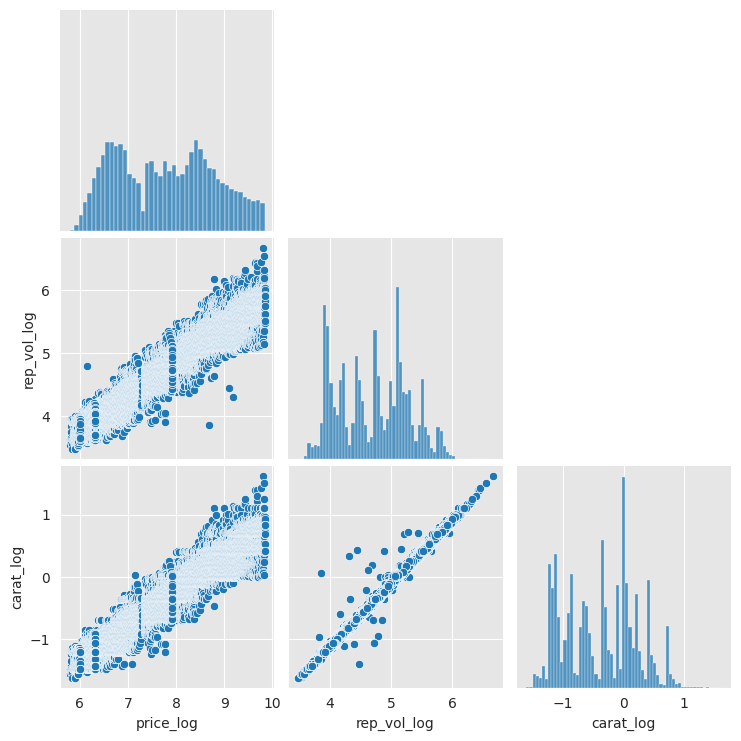

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=clean_data[['price_log' , 'rep_vol_log', 'carat_log']], corner=True)
plt.show()

Keeping the logarithmic scale, we can observe correlation between carats and representative volume, which tells us dependency, and notice a positive correlation from both (as would be expected due to dependency) to price.

Regarding the categorical variables:

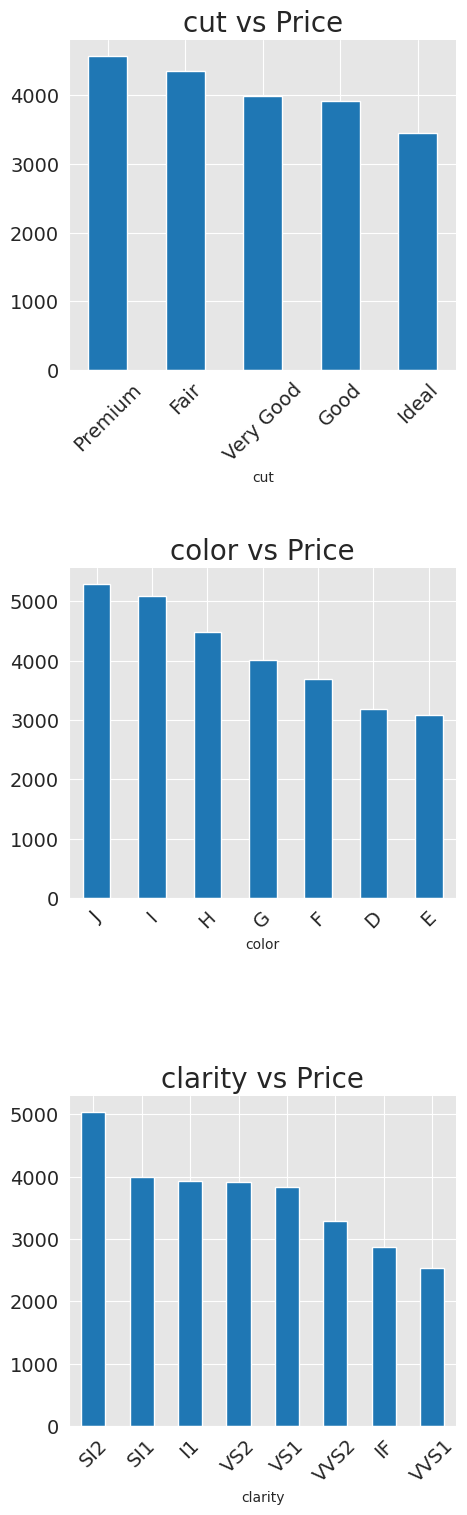

In [ ]:
fig, axarr = plt.subplots(3, 1, figsize=(5, 18))

clean_data.groupby('cut')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=14)
axarr[0].set_title("cut vs Price", fontsize=20)
axarr[0].tick_params(axis='x', rotation=45)

clean_data.groupby('color')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=14)
axarr[1].set_title("color vs Price", fontsize=20)
axarr[1].tick_params(axis='x', rotation=45)

clean_data.groupby('clarity')['price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2], fontsize=14)
axarr[2].set_title("clarity vs Price", fontsize=20)
axarr[2].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.6)
sns.despine()
plt.show()


Insights:
1. Premium and Fair diamonds cost more
2. Sl2 clarity diamonds have a higher price and VVS1 diamonds have the lowest.
3. Diamonds with J, I and H color tend to have a higher price

There is not a strong enough visual tendency for one of the categorical columns to be able to dictate a price prediction.

## Multivariate Analysis

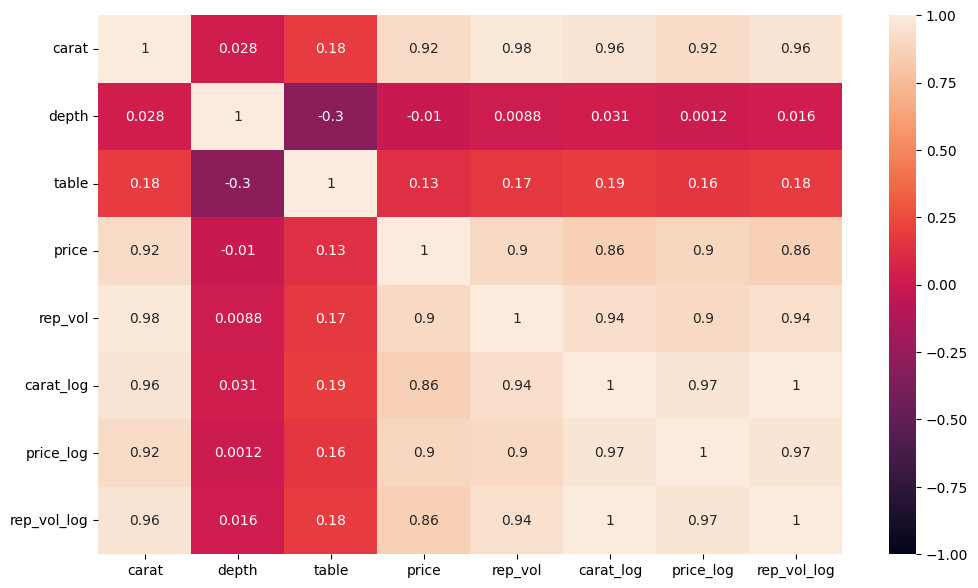

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(clean_data.drop(['x', 'y', 'z', 'cut', 'color', 'clarity' ], axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Insights:
1. Price on a logarithmic scale is strongly correlated to the representative volume also on a logarithmic scale (0.97)
2. Price is strongly correlated to carat (0.92)
3. Price is not correlated to table
4. Depth has no correlation to price
5. Carat and representative volume are perfectly correlated, so interdependent.






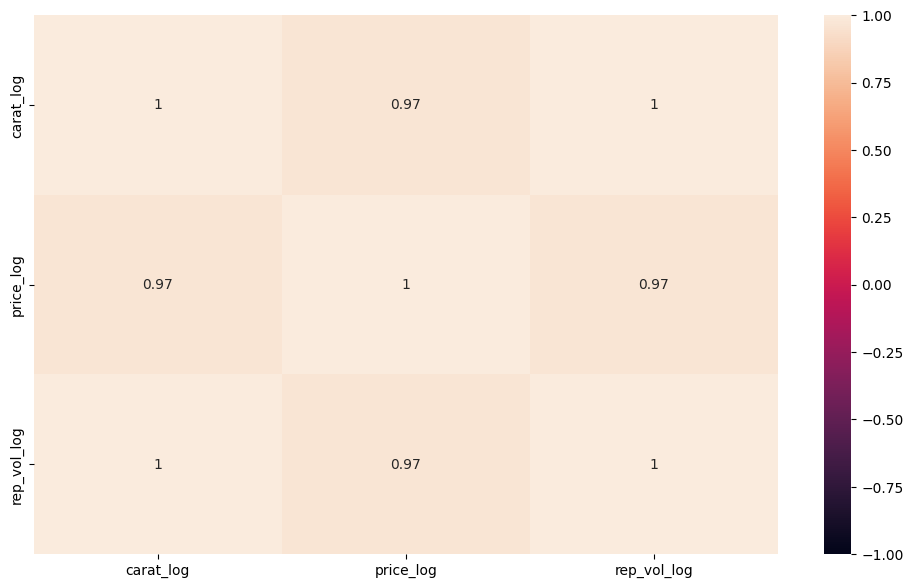

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(clean_data[['carat_log', 'price_log',  'rep_vol_log']].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

This last point tells us that there is a perfect correlation between the size of diamonds and carats. Taking a small dive into diamond weight and carat calculation I found out the following:


What does carat mean in diamonds?
> A 'carat' is a unit of measurement used in the diamond industry to specify the weight of a diamond. A carat is equal to 200 milligrams, so a 5-carat stone weighs 1 gram.

Is Diamond Carat The Same As Size?

>No - people often assume a diamond's size is synonymous with its carat weight, but this isn’t always the case. There are other factors that can affect the size of a diamond.

> Visually, different diamond shapes can make diamonds of the same carat size appear larger or smaller. For example, a marquise diamond will always appear larger than an oval diamond, simply because it has a larger surface area.

> Similarly, the cut of a diamond can also impact the size of a diamond. Poorly cut diamonds that change in depth or feature a thick girdle often weigh more but appear smaller because their weight sits in the base of the diamond. In turn, there is less surface area on top - so not only does your diamond appear smaller, it will also sparkle less.

This pertains domain knowledge and is something that would not have been looked by, either by the client or by getting the pertinent domain knowledge. Nevertheless this gives an insight, both the representative volume or the carats would be enough to predict the missing diamond price and these variables are perfectly correlated, that means they are linearly dependent, so choosing either one as a variable to predict the price is mathematically correct and equal.

The question regarding which one to choose resides purely in practicality, domain knowledge priority and, in case of applying a Machine Learning Model, feature importance, but that does not seem to be the case. With a 0.97 correlation to price, a linear regression model after a logarithmic scale transformation seems to suffice, but a performance metric like $R^2$ will be necessary to assert this hypothesis.

Regards choosing a variable to predict the price, carats is the obvious choice. It has a 0% of missing values and is based on weight, a direct measurement. Representative volume is not even the actual volume of the diamond. Therefore the variable chosen to predict diamond price will be carats.



# Price prediction via logarithmic regression

In [ ]:
missing_diamonds = {
    'carat': [0.71, 0.83, 0.5, 0.39, 0.32, 0.9, 0.51, 1.12, 0.4, 0.36],
    'cut': ['Good', 'Ideal', 'Ideal', 'Premium', 'Premium', 'Good', 'Ideal', 'Ideal', 'Ideal', 'Premium'],
    'color': ['I', 'G', 'E', 'J', 'G', 'F', 'D', 'G', 'G', 'I'],
    'clarity': ['VVS2', 'VS1', 'VS2', 'VS1', 'VS1', 'SI2', 'VS1', 'VVS2', 'VVS2', 'VS2'],
    'depth': [63.1, 62.1, 61.5, 61.6, 62.1, 63.3, 60.9, 62.1, 62.4, 62.7],
    'table': [58, 55, 55, 59, 56, 57, 57, 54.8, 56, 59],
    'x': [5.64, 6.02, 5.11, 4.67, 4.43, 6.08, 5.2, 6.64, 4.72, 4.54],
    'y': [5.71, 6.05, 5.16, 4.71, 4.4, 6.14, 5.17, 6.66, 4.74, 4.58],
    'z': [3.58, 3.75, 3.16, 2.89, 2.74, 3.87, 3.16, 4.13, 2.95, 2.86],
    'coordinates': ['35.02636, -114.38351', '35.00350, -109.78961', '35.10544, -106.669673', '34.94666, -104.64730', '35.18864, -101.98602', '35.26611, -99.63874', '35.51572, -97.67080', '36.163605, -95.75950', '37.689186, -92.6473', '38.66303, -90.21808']
}

missing_df = pd.DataFrame(missing_diamonds,index= np.arange(1,11,1))
missing_df['rep_vol'] = missing_df['x']*missing_df['y']*missing_df['z']

log_transform(missing_df,['carat', 'rep_vol'])

missing_df


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        10 non-null     float64
 1   cut          10 non-null     object 
 2   color        10 non-null     object 
 3   clarity      10 non-null     object 
 4   depth        10 non-null     float64
 5   table        10 non-null     float64
 6   x            10 non-null     float64
 7   y            10 non-null     float64
 8   z            10 non-null     float64
 9   coordinates  10 non-null     object 
 10  rep_vol      10 non-null     float64
 11  carat_log    10 non-null     float64
 12  rep_vol_log  10 non-null     float64
dtypes: float64(9), object(4)
memory usage: 1.1+ KB


,carat,cut,color,clarity,depth,table,x,y,z,coordinates,rep_vol,carat_log,rep_vol_log
1,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351",115.291752,-0.342490,4.747466
2,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961",136.578750,-0.186330,4.916901
3,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673",83.321616,-0.693147,4.422708
4,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730",63.567573,-0.941609,4.152103
5,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602",53.408080,-1.139434,3.977962
6,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874",144.471744,-0.105361,4.973084
7,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080",84.953440,-0.673345,4.442103
8,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950",182.638512,0.113329,5.207509
9,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473",65.999760,-0.916291,4.189651
10,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808",59.468552,-1.021651,4.085448


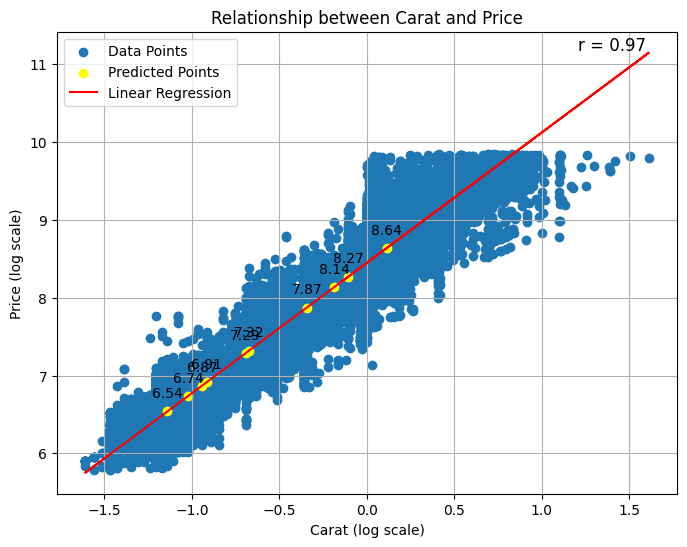

In [ ]:
from scipy import stats

carat_log = clean_data['carat_log']
price_log = clean_data['price_log']


#Linear regression model with carat data
slope, intercept, r, p, std_err = stats.linregress(carat_log, price_log)

def lin_regr(x):
  return slope * x + intercept

carat_log_linear_model = list(map(lin_regr, carat_log))

price_pred_carat_log = missing_df['carat_log'].apply(lin_regr)

#Plot of linear regression
plt.figure(figsize=(8, 6))
plt.scatter(carat_log, price_log, label='Data Points')
plt.scatter(missing_df['carat_log'], price_pred_carat_log, label='Predicted Points', color='yellow')
plt.plot(carat_log, carat_log_linear_model, color='red', label='Linear Regression')
for i, txt in enumerate(price_pred_carat_log):
    plt.annotate(f'{txt:.2f}', (missing_df['carat_log'].iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.text(0.95, 0.95, f'r = {r:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('Carat (log scale)')
plt.ylabel('Price (log scale)')
plt.title('Relationship between Carat and Price')
plt.grid(True)
plt.legend()
plt.show()


# Create a DataFrame with predicted prices in a normal scale
predicted_prices_df = pd.DataFrame({
    'carat': missing_df['carat'],
    'Predicted_Price_by_carat': np.exp( price_pred_carat_log)
})


In [ ]:
predicted_prices_df

,carat,Predicted_Price_by_carat
1,0.71,2629.955980
2,0.83,3416.872336
3,0.50,1461.103287
4,0.39,963.404316
5,0.32,691.508384
6,0.90,3913.557987
7,0.51,1510.416180
8,1.12,5646.390043
9,0.40,1005.169226
10,0.36,842.441835


## Linear Regression Model $R^2$'s performance metric and predicted prices

In [ ]:
r_squared = r ** 2
print("R-squared:", r_squared)

R-squared: 0.9331558752441934


Which means simple linear regression model on a logarithmic scale indicates 93.3% of the variance in price can be explained by the diamonds carats.

I consider this a quite high indicator of a sufficient relationship between these two variables, and would confidently give the prime minister the following table with the prices of the missing diamonds:




In [ ]:
missing_df['Predicted price'] = np.exp( price_pred_carat_log)
missing_diamond_list=missing_df.drop(['carat_log', 'rep_vol', 'rep_vol_log'], axis=1)
missing_diamond_list

,carat,cut,color,clarity,depth,table,x,y,z,coordinates,Predicted price
1,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351",2629.955980
2,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961",3416.872336
3,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673",1461.103287
4,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730",963.404316
5,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602",691.508384
6,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874",3913.557987
7,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080",1510.416180
8,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950",5646.390043
9,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473",1005.169226
10,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808",842.441835


In [ ]:
missing_diamond_list['Predicted price'].sum()

22080.81957364434

In [ ]:
clean_data['price'].sum()

199634040

In [ ]:
(missing_diamond_list['Predicted price'].sum()/clean_data['price'].sum())*100

0.011060648561560114

## Appendix

Just out of curiosity, I will see the prediction difference with the representative volume variable, without changing the reasoning behind choosing carats as the defining variable to predict prices.

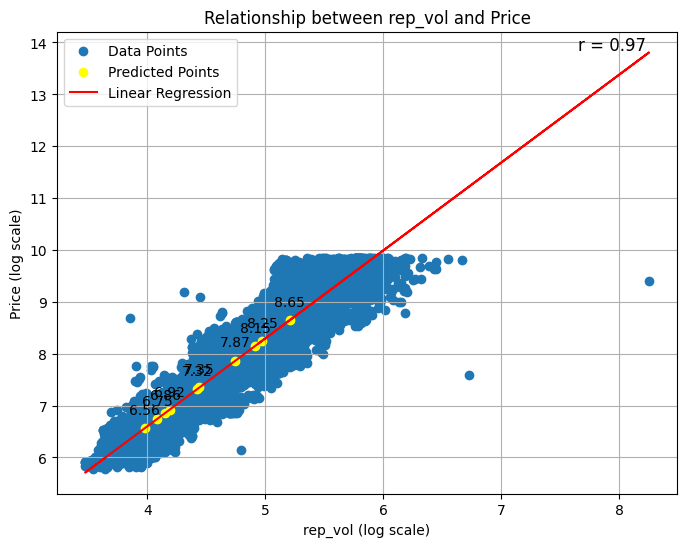

In [ ]:
rep_vol_log = clean_data['rep_vol_log']
price_log = clean_data['price_log']

#Linear regression model with rep_vol data
slope, intercept, r, p, std_err = stats.linregress(rep_vol_log, price_log)

def lin_regr(x):
  return slope * x + intercept

rep_vol_log_linear_model = list(map(lin_regr, rep_vol_log))

price_pred_rep_vol_log = missing_df['rep_vol_log'].apply(lin_regr)

#Plot of linear regression
plt.figure(figsize=(8, 6))
plt.scatter(rep_vol_log, price_log, label='Data Points')
plt.scatter(missing_df['rep_vol_log'], price_pred_rep_vol_log, label='Predicted Points', color='yellow')
plt.plot(rep_vol_log, rep_vol_log_linear_model, color='red', label='Linear Regression')
for i, txt in enumerate(price_pred_rep_vol_log):
    plt.annotate(f'{txt:.2f}', (missing_df['rep_vol_log'].iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
plt.text(0.95, 0.95, f'r = {r:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('rep_vol (log scale)')
plt.ylabel('Price (log scale)')
plt.title('Relationship between rep_vol and Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
predicted_prices_df.insert(1,'rep_vol', missing_df['rep_vol'])
predicted_prices_df['Predicted_Price_by_rep_vol']= np.exp( price_pred_rep_vol_log)
predicted_prices_df

,carat,rep_vol,Predicted_Price_by_carat,Predicted_Price_by_rep_vol
1,0.71,115.291752,2629.955980,2608.486861
2,0.83,136.578750,3416.872336,3475.350203
3,0.50,83.321616,1461.103287,1505.040421
4,0.39,63.567573,963.404316,951.775029
5,0.32,53.408080,691.508384,708.701628
6,0.90,144.471744,3913.557987,3822.236735
7,0.51,84.953440,1510.416180,1555.293293
8,1.12,182.638512,5646.390043,5684.907972
9,0.40,65.999760,1005.169226,1014.257890
10,0.36,59.468552,842.441835,850.183782


In [ ]:
r_squared = r ** 2
print("R-squared:", r_squared)

R-squared: 0.9337768568782144
